# Transforms can also be used to align two meshes

In [1]:
import shapeworks as sw
import numpy as np
import pyvista as pv
import matplotlib

In [2]:
pv.set_jupyter_backend('static')

In [4]:
DATA = r"C:\Users\ullri\OneDrive\prog_egyetem\projectAI\FemurData\meshes_vtk"

## Mesh alignment
A mesh transformation can be computed rigidly, using similarity, or as an affine matrix. The alignment is computed using the iterative closest point (ICP) method for the specified number of iterations (default: a similarity transform with 10 iterations).

In [5]:
filename1 = DATA + "\m06_L_femur.vtk"
filename2 = DATA + "\m07_L_femur.vtk"
print(filename1)

C:\Users\ullri\OneDrive\prog_egyetem\projectAI\FemurData\meshes_vtk\m06_L_femur.vtk


#### Load meshes

In [6]:
mesh1 = sw.Mesh(filename1)
mesh2 = sw.Mesh(filename2)
mesh1

{
number of points: 10003,
number of faces: 20002,
center: [0.90485, 1.62215, 8.00985],
center or mass: [-3.38446, 1.04312, 9.02459],
bounding box: {
	min: [-39.8151, -21.6645, -37.6093],
	max: [41.6248, 24.9088, 53.629]
},
field names: 
	Normals

#### Visualize original meshes

In [7]:
pv_mesh1_orig = sw.sw2vtkMesh(mesh1)
pv_mesh2_orig = sw.sw2vtkMesh(mesh2)

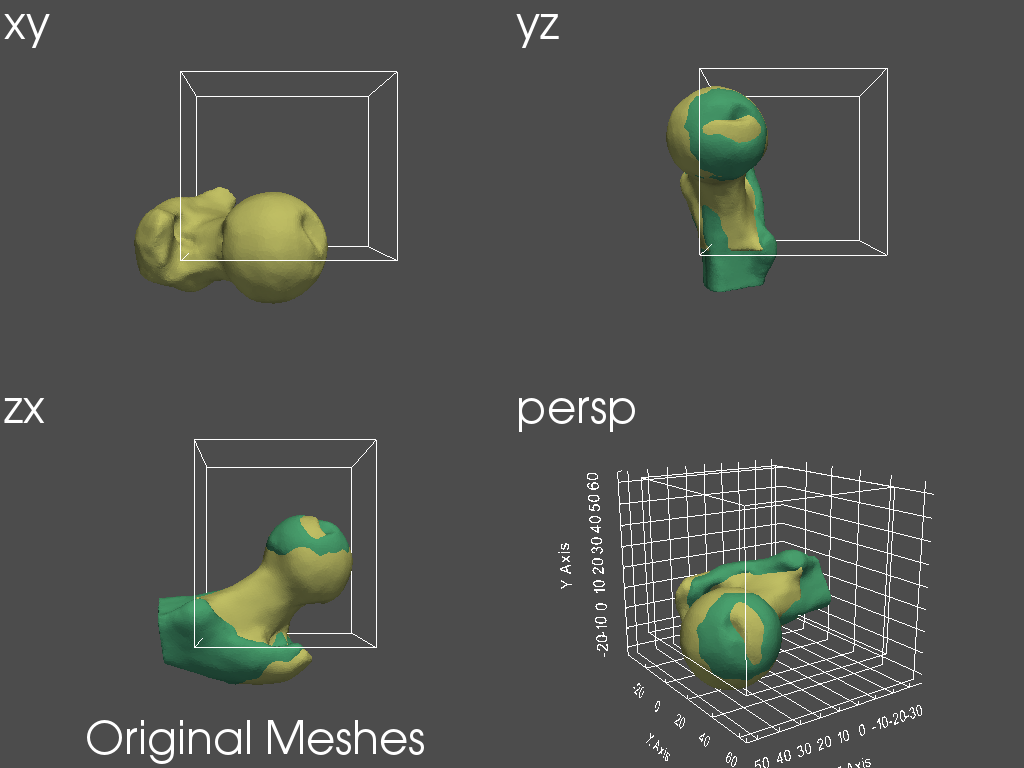

In [25]:
# used to maintain bounds even when meshes' positions change
a = pv.UniformGrid()
a.dimensions = np.array([9,8,8])
a.origin = (-15,-5,-15)
a.spacing = (10, 10, 10)
outline = a.outline()

p = pv.Plotter(shape=(2,2), border=False)

p.subplot(0,0)
p.add_text("xy")
p.add_mesh(outline)
#p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', opacity=1.0)
p.camera_position = 'xy'

p.subplot(0,1)
p.add_text("yz")
p.add_mesh(outline)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', opacity=1.0)
p.camera_position = 'yz'

p.subplot(1,0)
p.add_text("zx")
p.add_mesh(outline)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', opacity=1.0)
p.camera_position = 'zx'

p.add_text("Original Meshes", position='lower_edge')

p.subplot(1,1)
p.add_text("persp")
p.add_mesh(outline)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', opacity=1.0)
p.camera_position = [100,35,70]
p.set_viewup([0,1,0])
p.show_bounds(grid='front', location='outer', all_edges=False, )

p.show()

### Rigid transformation

#### create transforms

In [11]:
xform_1_to_2 = mesh1.createTransform(mesh2, sw.Mesh.AlignmentType.Rigid)
xform_2_to_1 = mesh2.createTransform(mesh1, sw.Mesh.AlignmentType.Rigid)

#### apply transforms

In [12]:
mesh1.applyTransform(xform_1_to_2)
mesh2.applyTransform(xform_2_to_1)

{
number of points: 10000,
number of faces: 19996,
center: [1.14107, -0.150485, 15.6509],
center or mass: [-3.21932, 0.262587, 13.4095],
bounding box: {
	min: [-39.3097, -23.6757, -21.3534],
	max: [41.5918, 23.3747, 52.6551]
},
field names: 
	Normals

#### visualize results
Notice how the original meshes do not change shape. This is very different from affine transformations below.

In [13]:
pv_mesh1 = sw.sw2vtkMesh(mesh1)
pv_mesh2 = sw.sw2vtkMesh(mesh2)

#### Mesh 1 -> Mesh 2

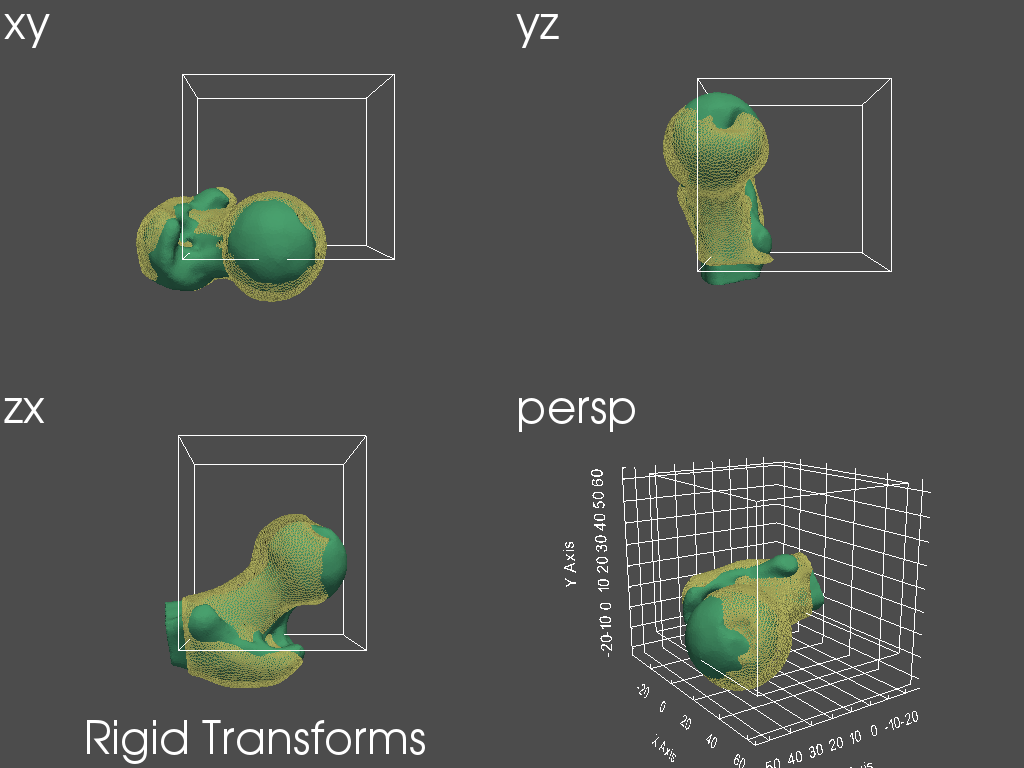

In [24]:
# used to maintain bounds even when meshes' positions change
a = pv.UniformGrid()
a.dimensions = np.array([9,8,8])
a.origin = (-15,-5,-15)
a.spacing = (10, 10, 10)
outline = a.outline()

p = pv.Plotter(shape=(2,2), border=False)

p.subplot(0,0)
p.add_text("xy")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'xy'

p.subplot(0,1)
p.add_text("yz")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'yz'

p.subplot(1,0)
p.add_text("zx")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'zx'

p.add_text("Rigid Transforms", position='lower_edge')

p.subplot(1,1)
p.add_text("persp")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.75)
p.camera_position = [100,35,70]
p.set_viewup([0,1,0])
p.show_bounds(grid='front', location='outer', all_edges=False, )

p.show()

#### Mesh 2 -> Mesh 1

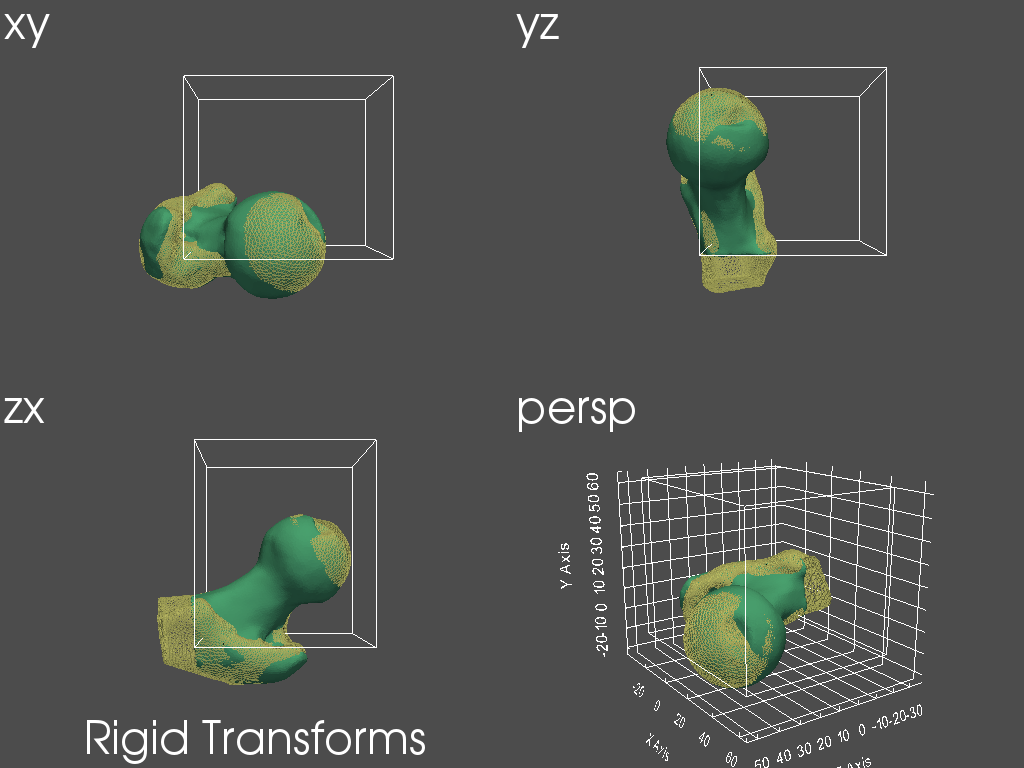

In [15]:
# used to maintain bounds even when meshes' positions change
a = pv.UniformGrid()
a.dimensions = np.array([9,8,8])
a.origin = (-15,-5,-15)
a.spacing = (10, 10, 10)
outline = a.outline()

p = pv.Plotter(shape=(2,2), border=False)

p.subplot(0,0)
p.add_text("xy")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'xy'

p.subplot(0,1)
p.add_text("yz")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'yz'

p.subplot(1,0)
p.add_text("zx")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'zx'

p.add_text("Rigid Transforms", position='lower_edge')

p.subplot(1,1)
p.add_text("persp")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.75)
p.camera_position = [100,35,70]
p.set_viewup([0,1,0])
p.show_bounds(grid='front', location='outer', all_edges=False, )

p.show()

### Similarity transformation
This type of transformation is very similar to rigid transformations above.

#### Reload meshes

In [16]:
mesh1 = sw.Mesh(filename1)
mesh2 = sw.Mesh(filename2)

#### create transforms

In [17]:
xform_1_to_2 = mesh1.createTransform(mesh2, sw.Mesh.AlignmentType.Similarity)
xform_2_to_1 = mesh2.createTransform(mesh1, sw.Mesh.AlignmentType.Similarity)

#### apply transforms

In [18]:
mesh1.applyTransform(xform_1_to_2)
mesh2.applyTransform(xform_2_to_1)

{
number of points: 10000,
number of faces: 19996,
center: [1.20062, -0.187831, 15.6566],
center or mass: [-3.19283, 0.24957, 13.3594],
bounding box: {
	min: [-39.6775, -24.0203, -21.7824],
	max: [42.0787, 23.6447, 53.0955]
},
field names: 
	Normals

#### visualize results
Notice how the original meshes do not change shape (or orientation wrt the origin? How are these different from affine?)

In [19]:
pv_mesh1 = sw.sw2vtkMesh(mesh1)
pv_mesh2 = sw.sw2vtkMesh(mesh2)

#### Mesh 1 -> Mesh 2

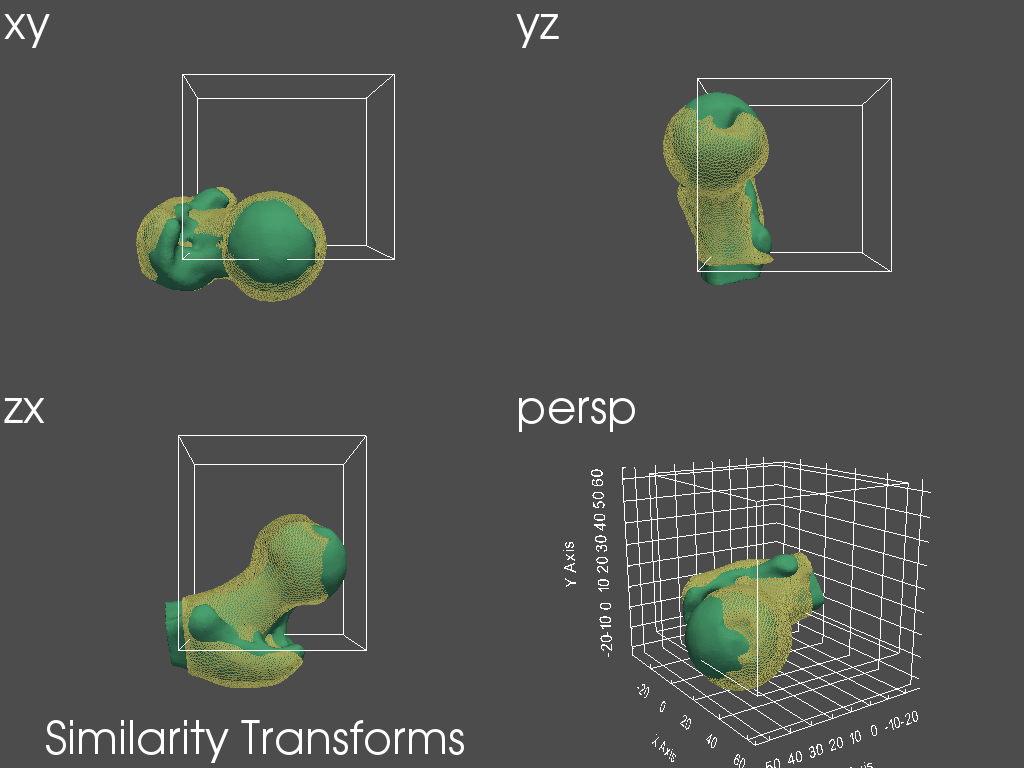

In [20]:
# used to maintain bounds even when meshes' positions change
a = pv.UniformGrid()
a.dimensions = np.array([9,8,8])
a.origin = (-15,-5,-15)
a.spacing = (10, 10, 10)
outline = a.outline()

p = pv.Plotter(shape=(2,2), border=False)

p.subplot(0,0)
p.add_text("xy")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'xy'

p.subplot(0,1)
p.add_text("yz")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'yz'

p.subplot(1,0)
p.add_text("zx")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'zx'

p.add_text("Similarity Transforms", position='lower_edge')

p.subplot(1,1)
p.add_text("persp")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.75)
p.camera_position = [100,35,70]
p.set_viewup([0,1,0])
p.show_bounds(grid='front', location='outer', all_edges=False, )

p.show()

#### Mesh 2 -> Mesh 1

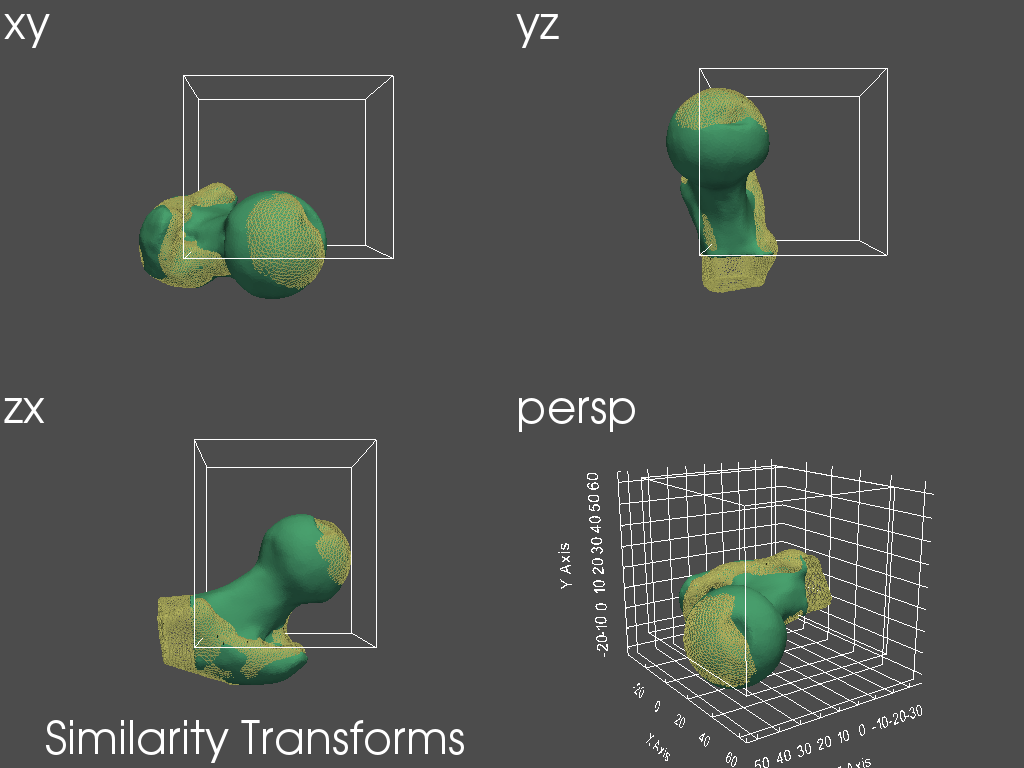

In [21]:
# used to maintain bounds even when meshes' positions change
a = pv.UniformGrid()
a.dimensions = np.array([9,8,8])
a.origin = (-15,-5,-15)
a.spacing = (10, 10, 10)
outline = a.outline()

p = pv.Plotter(shape=(2,2), border=False)

p.subplot(0,0)
p.add_text("xy")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'xy'

p.subplot(0,1)
p.add_text("yz")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'yz'

p.subplot(1,0)
p.add_text("zx")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'zx'

p.add_text("Similarity Transforms", position='lower_edge')

p.subplot(1,1)
p.add_text("persp")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.75)
p.camera_position = [100,35,70]
p.set_viewup([0,1,0])
p.show_bounds(grid='front', location='outer', all_edges=False, )

p.show()

### Affine transformation
This type of transformation warps the points of one mesh into the other as well as translating its position.

#### Reload meshes

In [22]:
mesh1 = sw.Mesh(filename1)
mesh2 = sw.Mesh(filename2)

#### create transforms

In [17]:
xform_1_to_2 = mesh1.createTransform(mesh2, sw.Mesh.AlignmentType.Affine)
xform_2_to_1 = mesh2.createTransform(mesh1, sw.Mesh.AlignmentType.Affine)

#### apply transforms

In [18]:
mesh1.applyTransform(xform_1_to_2)
mesh2.applyTransform(xform_2_to_1)

{
number of points: 530,
number of faces: 1056,
center: [4.94445, 6.99692, 21.997],
center or mass: [4.94445, 6.99692, 21.997],
bounding box: {
	min: [-12.394, -3.02622, 5.89151],
	max: [22.2829, 17.0201, 38.1025]
},
field names: 
	Normals

#### visualize results
Notice how the original meshes do not change shape (or orientation wrt the origin? How are these different from affine?)

In [19]:
pv_mesh1 = sw.sw2vtkMesh(mesh1)
pv_mesh2 = sw.sw2vtkMesh(mesh2)

#### Mesh 1 -> Mesh 2

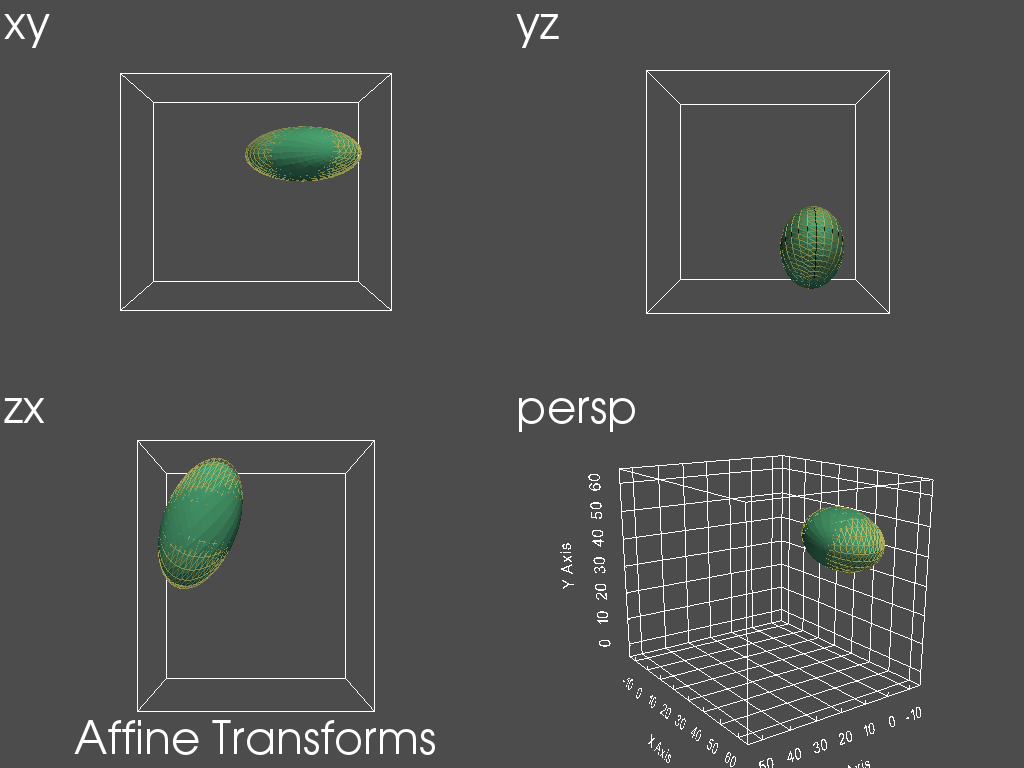

In [20]:
# used to maintain bounds even when meshes' positions change
a = pv.UniformGrid()
a.dimensions = np.array([9,8,8])
a.origin = (-15,-5,-15)
a.spacing = (10, 10, 10)
outline = a.outline()

p = pv.Plotter(shape=(2,2), border=False)

p.subplot(0,0)
p.add_text("xy")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'xy'

p.subplot(0,1)
p.add_text("yz")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'yz'

p.subplot(1,0)
p.add_text("zx")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'zx'

p.add_text("Affine Transforms", position='lower_edge')

p.subplot(1,1)
p.add_text("persp")
p.add_mesh(outline)
p.add_mesh(pv_mesh1, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh2_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.75)
p.camera_position = [100,35,70]
p.set_viewup([0,1,0])
p.show_bounds(grid='front', location='outer', all_edges=False, )

p.show()

#### Mesh 2 -> Mesh 1

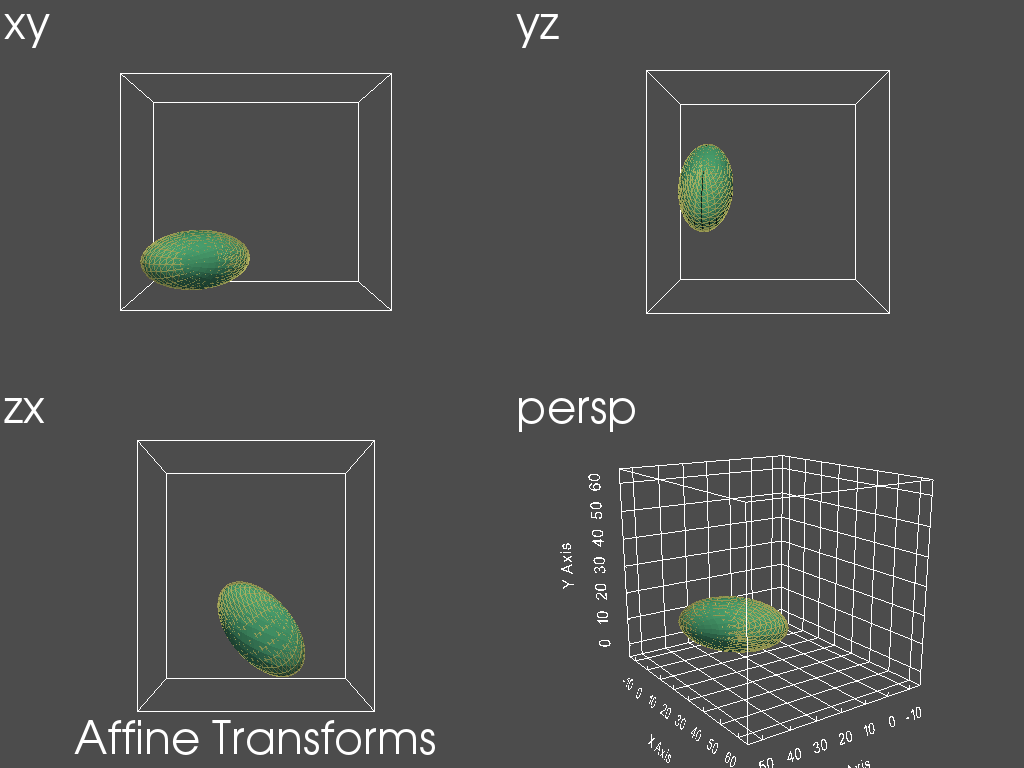

In [21]:
# used to maintain bounds even when meshes' positions change
a = pv.UniformGrid()
a.dimensions = np.array([9,8,8])
a.origin = (-15,-5,-15)
a.spacing = (10, 10, 10)
outline = a.outline()

p = pv.Plotter(shape=(2,2), border=False)

p.subplot(0,0)
p.add_text("xy")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'xy'

p.subplot(0,1)
p.add_text("yz")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'yz'

p.subplot(1,0)
p.add_text("zx")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.5)
p.camera_position = 'zx'

p.add_text("Affine Transforms", position='lower_edge')

p.subplot(1,1)
p.add_text("persp")
p.add_mesh(outline)
p.add_mesh(pv_mesh2, show_scalar_bar=False, color='#4fb080', opacity=1.0)
p.add_mesh(pv_mesh1_orig, show_scalar_bar=False, color='#ced175', style='wireframe', opacity=0.75)
p.camera_position = [100,35,70]
p.set_viewup([0,1,0])
p.show_bounds(grid='front', location='outer', all_edges=False, )

p.show()